### Video Sequences data preparation

In [16]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import re

### Padded with lastet frame

In [17]:
# class VideoSequenceDataset(Dataset):
#     def __init__(self, root_dir, transform=None, sequence_length=160):
#         self.root_dir = root_dir
#         self.transform = transform
#         self.sequence_length = sequence_length  # Set target sequence length
#         self.classes = os.listdir(root_dir)
#         self.data = self.load_sequences()

#     def load_sequences(self):
#         data = []
#         for class_idx, class_folder in enumerate(self.classes):
#             class_path = os.path.join(self.root_dir, class_folder)

#             # List and sort frames numerically
#             image_sequences = sorted(os.listdir(class_path), key=self.natural_sort_key)
#             frames = [os.path.join(class_path, img) for img in image_sequences]

#             data.append((frames, class_idx))
#         return data

#     def natural_sort_key(self, string):
#         # Extract numbers from the filename to ensure numeric sorting
#         return [int(text) if text.isdigit() else text for text in re.split(r'(\d+)', string)]

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         image_paths, label = self.data[idx]
#         images = [Image.open(img_path).convert('RGB') for img_path in image_paths]

#         # Pad the sequence to the target length (self.sequence_length)
#         if len(images) < self.sequence_length:
#             pad_size = self.sequence_length - len(images)
#             # Repeat the last frame or pad with black frames
#             last_image = images[-1]
#             pad_images = [last_image] * pad_size
#             images.extend(pad_images)
#         elif len(images) > self.sequence_length:
#             # Truncate the sequence if it exceeds the target length
#             images = images[:self.sequence_length]

#         if self.transform:
#             images = [self.transform(img) for img in images]

#         images = torch.stack(images, dim=0)  # Stack into a tensor

#         return images, label

### Padded with zeros

In [18]:
class VideoSequenceDataset(Dataset):
    def __init__(self, root_dir, transform, sequence_length=160):
        self.root_dir = root_dir
        self.transform = transform
        self.sequence_length = sequence_length  # Set target sequence length
        self.classes = os.listdir(root_dir)
        self.data = self.load_sequences()

    def load_sequences(self):
        data = []
        for class_idx, class_folder in enumerate(self.classes):
            class_path = os.path.join(self.root_dir, class_folder)

            # List and sort frames numerically
            image_sequences = sorted(os.listdir(class_path), key=self.natural_sort_key)
            frames = [os.path.join(class_path, img) for img in image_sequences]

            data.append((frames, class_idx))
        return data

    def natural_sort_key(self, string):
        # Extract numbers from the filename to ensure numeric sorting
        return [int(text) if text.isdigit() else text for text in re.split(r'(\d+)', string)]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_paths, label = self.data[idx]
        images = [Image.open(img_path).convert('RGB') for img_path in image_paths]

        # If there are fewer images than the sequence length, pad with zeros
        if len(images) < self.sequence_length:
            pad_size = self.sequence_length - len(images)
            # Create a black (zero) image of the same size as the input (e.g., 224x224)
            zero_image = Image.new('RGB', (224, 224), (0, 0, 0))  # Black image
            pad_images = [zero_image] * pad_size
            images.extend(pad_images)
        elif len(images) > self.sequence_length:
            # Truncate the sequence if it exceeds the target length
            images = images[:self.sequence_length]

        if self.transform:
            images = [self.transform(img) for img in images]

        images = torch.stack(images, dim=0)  # Stack into a tensor

        return torch.tensor(images, dtype=torch.float32), label

In [19]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a fixed size
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

In [20]:
# Set parameters
test_dir = 'C:/Users/araya/Desktop/frame/train'
sequence_length = 160  # Set how many frames per sequence

# Initialize dataset and dataloader
dataset = VideoSequenceDataset(root_dir=test_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

# Example of accessing the data
for batch_idx, (frames, labels) in enumerate(dataloader):
    print(f"Batch {batch_idx+1}")
    print("Frames shape:", frames.shape)  # Should be [batch_size, sequence_length, C, H, W]
    print("Labels:", labels)
    break  # Process just the first batch

C:\Users\araya\AppData\Local\Temp\ipykernel_27300\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


Batch 1
Frames shape: torch.Size([3, 160, 3, 224, 224])
Labels: tensor([3, 4, 7])


In [21]:
dataloader

In [22]:
dataset

In [23]:
len(dataloader.dataset[0][0])

C:\Users\araya\AppData\Local\Temp\ipykernel_27300\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


160

In [24]:
dataloader.dataset[0][0][0]

C:\Users\araya\AppData\Local\Temp\ipykernel_27300\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


tensor([[[ 0.2796,  0.2624,  0.2624,  ...,  0.2453,  0.2453,  0.2453],
         [ 0.2796,  0.2624,  0.2624,  ...,  0.2453,  0.2453,  0.2453],
         [ 0.2796,  0.2624,  0.2624,  ...,  0.2453,  0.2453,  0.2453],
         ...,
         [-0.4397, -0.4397, -0.4397,  ..., -0.4911, -0.4911, -0.4911],
         [-0.4397, -0.4397, -0.4397,  ..., -0.4911, -0.4911, -0.4911],
         [-0.4397, -0.4397, -0.4397,  ..., -0.4911, -0.4911, -0.4911]],

        [[ 0.3978,  0.3803,  0.3803,  ...,  0.3978,  0.3978,  0.3978],
         [ 0.3978,  0.3803,  0.3803,  ...,  0.3978,  0.3978,  0.3978],
         [ 0.3978,  0.3803,  0.3803,  ...,  0.3978,  0.3978,  0.3978],
         ...,
         [-0.3025, -0.3025, -0.3025,  ..., -0.3550, -0.3550, -0.3550],
         [-0.3025, -0.3025, -0.3025,  ..., -0.3550, -0.3550, -0.3550],
         [-0.3025, -0.3025, -0.3025,  ..., -0.3550, -0.3550, -0.3550]],

        [[ 0.7576,  0.7402,  0.7402,  ...,  0.7054,  0.7054,  0.7054],
         [ 0.7576,  0.7402,  0.7402,  ...,  0

C:\Users\araya\AppData\Local\Temp\ipykernel_27300\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


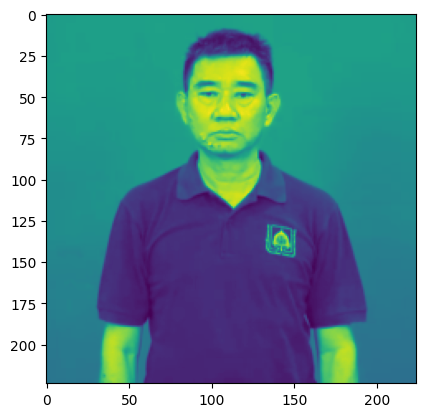

In [25]:
import matplotlib.pyplot as plt 

plt.imshow(dataloader.dataset[0][0][141][0]) # [จำนวน class][][เฟรมที่][เปลี่ยนสี]

In [26]:
dataloader.dataset.classes

['กฎกระทรวง',
 'กฎหมายรัฐธรรมนูญ',
 'กรมอนามัย',
 'กรรม',
 'กรรมสิทธิ์',
 'กระโดด',
 'กล้วยบวชชี',
 'กล้วยเชื่อม',
 'กังวล',
 'กีฬา']

In [27]:
print(len(dataloader.dataset[0][0]))  
print(len(dataloader.dataset[1][0]))  
print(len(dataloader.dataset[2][0]))  
print(len(dataloader.dataset[3][0]))  
print("เราต้อง padded lenght ให้เท่ากัน ก่อนเข้า model")

C:\Users\araya\AppData\Local\Temp\ipykernel_27300\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


160
160
160
160
เราต้อง padded lenght ให้เท่ากัน ก่อนเข้า model


### -------------------------------------------------------------------------------------------------------------------------
### cuda or cpu ?

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [29]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torchvision
from torchvision import models
from torchvision.models import resnet18

class Model(nn.Module):
    def __init__(self, num_classes=9):
        super(Model, self).__init__()
        self.resnet = models.mobilenet_v2(pretrained=True)
        self.resnet.fc = nn.Sequential(nn.Linear(self.resnet.fc.in_features, 512))
        self.fc1 = nn.Linear(512, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x_3d):
        # (bs, C, T, H, W)
        x_3d = x_3d.permute(0, 2, 1, 3, 4)

        logits = []
        for t in range(x_3d.size(1)):
            out = self.resnet(x_3d[:, t, :, :, :])

            x = self.fc1(out)
            x = F.relu(x)
            x = self.fc2(x)

            logits.append(x)

        # Mean Pooling 
        logits = torch.stack(logits, dim=0)
        logits = torch.mean(logits, dim=0)
        return logits

In [30]:
model = Model(num_classes=9)

In [31]:
param = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Model has {param} parameters")

Model has 2946569 parameters


In [32]:
dataloader.dataset[0][0].shape

C:\Users\araya\AppData\Local\Temp\ipykernel_27300\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


torch.Size([160, 3, 224, 224])

In [33]:
input = dataloader.dataset[5][0].unsqueeze(0)
input.shape

C:\Users\araya\AppData\Local\Temp\ipykernel_27300\4150219448.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(images, dtype=torch.float32), label


torch.Size([1, 160, 3, 224, 224])

In [34]:
input = input.permute(0, 2, 1, 3, 4)

In [35]:
output = model(input)

In [36]:
output

tensor([[-0.0041, -0.1406, -0.0176, -0.0090,  0.0995,  0.0705, -0.0377, -0.0492,
         -0.0709]], grad_fn=<MeanBackward1>)

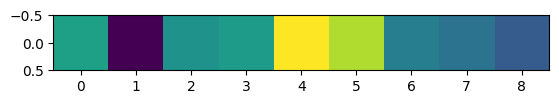

In [37]:
import matplotlib.pyplot as plt 

plt.imshow(output.detach().numpy())